In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re
import matplotlib.pyplot as plt
import glob as glob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## 1.Data EDA

In [2]:
raw_data = pd.read_csv('data_scientist_united_states_job_postings_jobspikr.csv')

In [3]:
raw_data.head()

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN


In [4]:
data = raw_data.drop(columns=['url', 'inferred_city', 'inferred_state', 'job_type', 'salary_offered',
                              'job_board', 'geo', 'contact_email','contact_phone_number', 'html_job_description'])

In [5]:
data.head()

,crawl_timestamp,job_title,category,company_name,city,state,country,inferred_country,post_date,job_description,cursor,uniq_id
0,2019-02-06 05:26:22 +0000,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Usa,2019-02-06,Read what people are saying about working here...,1549432819114777,3b6c6acfcba6135a31c83bd7ea493b18
1,2019-02-06 05:33:41 +0000,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Usa,2019-02-05,We have an immediate opening for a Sharp Data ...,1549432819122106,741727428839ae7ada852eebef29b0fe
2,2019-02-06 05:33:35 +0000,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,Usa,2019-02-05,Candidates should have the following backgroun...,1549432819236156,cdc9ef9a1de327ccdc19cc0d07dbbb37
3,2019-02-06 05:33:42 +0000,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,Usa,2019-02-06,Read what people are saying about working here...,1549432819259473,1c8541cd2c2c924f9391c7d3f526f64e
4,2019-02-06 05:48:23 +0000,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Usa,2019-02-05,We are seeking an extraordinary Data Scientist...,1549436429015957,445652a560a5441060857853cf267470


### Data Exploration

In [35]:
# drop NA rows
data_com = data[pd.notnull(data['company_name'])]

Toatl number of firms 4137
Top 25 firms with most vacancies                                   company_name  job_title
1350                               CyberCoders        628
2197                           Jefferson Frank        259
2667              Nigel Frank International US         88
552                        Booz Allen Hamilton         77
3482                                   Taboola         77
331                               Apex Systems         72
2285                         Kforce Technology         71
3587                           The Judge Group         67
3305  Social Science Research Solutions (SSRS)         67
3142                    Robert Half Technology         63
3464                           TEKsystems, Inc         61
1616                                  Facebook         56
1984                                       IBM         52
2238                                      KPMG         49
2339                                    Leidos         49
3071        

Text(0, 0.5, 'Number of jobs')

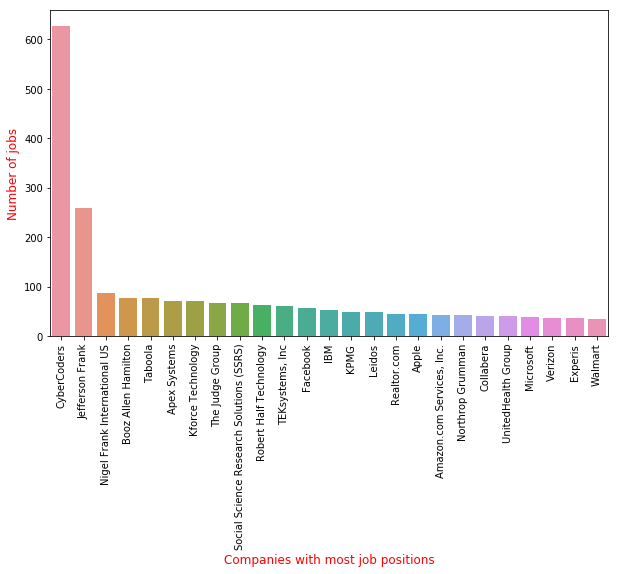

In [44]:
num_company=data_com['company_name'].nunique()
print('Toatl number of firms',num_company)

#finding highest number of vacancy in a company
company=data_com.groupby(['company_name'])['job_title'].count()
company=company.reset_index()
company=company.sort_values(['job_title'],ascending=False)
print('Top 25 firms with most vacancies',company.head(25))

fig, ax = plt.subplots(figsize = (10,6))
ax=seaborn.barplot(x="company_name", y="job_title", data=company.head(25))    
ax.set_xticklabels(company['company_name'],rotation=90)  
ax.set_xlabel('Companies with most job positions',fontsize=12, color='red')
ax.set_ylabel('Number of jobs',fontsize=12,color='red')

In [34]:
data_role = data[pd.notnull(data['job_title'])]

Toatl number of roles across all the firms 2754
Top 25 most wanted roles across firms                                               job_title  company_name
324                                      Data Scientist          2888
2141                              Senior Data Scientist           644
2556                                 Sr. Data Scientist           203
1734                                Lead Data Scientist           179
1937                           Principal Data Scientist           148
878                                   Data Scientist II           107
112                            Associate Data Scientist            82
2501                                  Sr Data Scientist            81
1714                              Junior Data Scientist            53
861                                    Data Scientist I            49
1155               Data Scientist, (Staff or Principal)            45
271                                      DATA SCIENTIST            39
2666

Text(0, 0.5, 'Number of job roles')

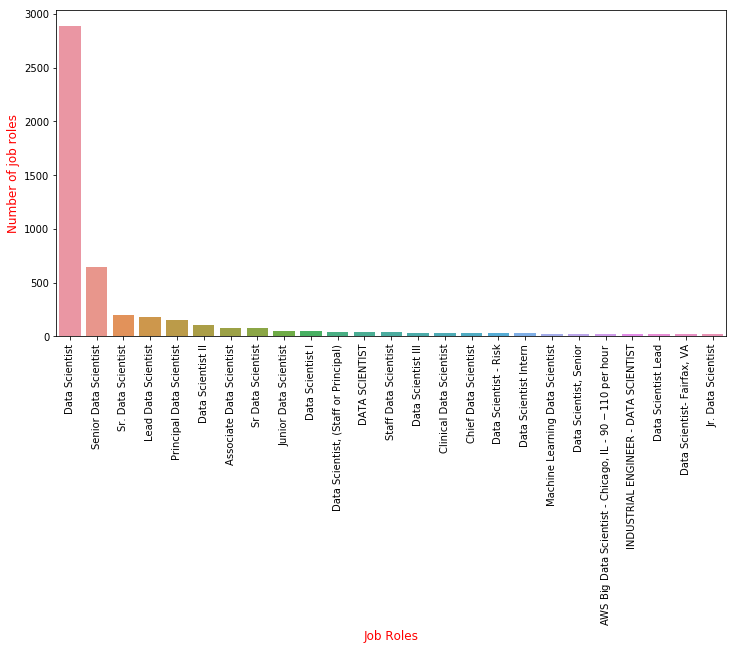

In [47]:
# Finding total number of unique roles
total_no_roles=data_role['job_title'].nunique()
print('Toatl number of roles across all the firms',total_no_roles)

# most offered roles across all the firms
roles=data_role.groupby(['job_title'])['company_name'].count()
roles=roles.reset_index()
roles=roles.sort_values(['company_name'],ascending=False)  
print('Top 25 most wanted roles across firms',roles.head(25))

fig,ax=plt.subplots(figsize=(12,6))
ax=seaborn.barplot(x="job_title", y="company_name", data=roles.head(25))    
ax.set_xticklabels(roles['job_title'],rotation=90)
ax.set_xlabel('Job Roles',fontsize=12,color='red')
ax.set_ylabel('Number of job roles',fontsize=12,color='red')

In [33]:
data_cat = data[pd.notnull(data['category'])]

Toatl number of categoris across all the firms 366
Top 30 most popular categories                               category  company_name
32                Computer-or-internet          1505
313                      computer jobs           911
335   life physical and social science           758
138        Engineering-or-architecture           729
178        Manufacturing-or-mechanical           632
309  business and financial operations           616
341                          math jobs           582
33                   Computer/Internet           467
139           Engineering/Architecture           324
41                      Data Scientist           223
179           Manufacturing/Mechanical           159
4                Accounting-or-finance           155
17                      Administrative           135
5                   Accounting/Finance           129
302       architecture and engineering           111
212                              Sales            93
38               

Text(0, 0.5, 'Number of jobs')

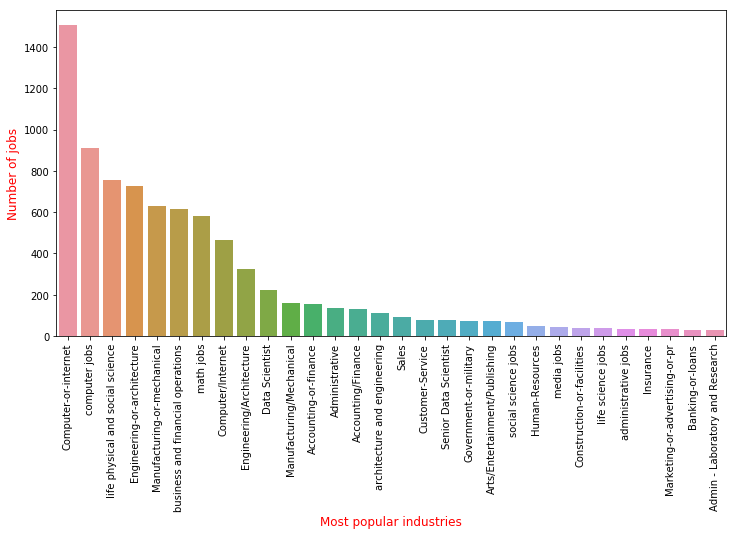

In [49]:
# Finding total number of unique categories
total_cat=data_cat['category'].nunique()
print('Toatl number of categoris across all the firms',total_cat)
# most popular industries
indus=data_cat.groupby(['category'])['company_name'].count()
indus=indus.reset_index()
indus=indus.sort_values(['company_name'],ascending=False)   
print('Top 30 most popular categories',indus.head(30))

fig,ax=plt.subplots(figsize=(12,6))
ax=seaborn.barplot(x="category", y="company_name", data=indus.head(30))    
ax.set_xticklabels(indus['category'],rotation=90)
ax.set_xlabel('Most popular industries',fontsize=12,color='red')
ax.set_ylabel('Number of jobs',fontsize=12,color='red')#

### WordCloud

In [18]:
text = ''
for x in data['job_description'].str.lower():
    text = text + x

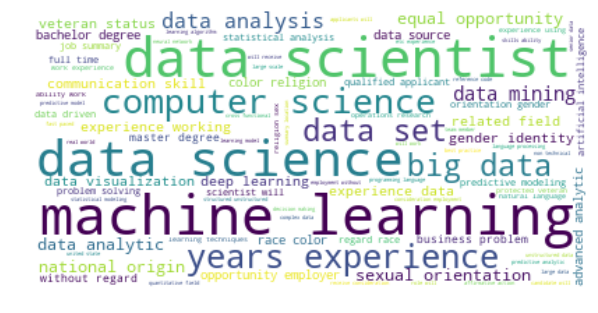

In [32]:
# lower max_font_size, change the maximum number of word and lighten the background:
plt.figure(figsize=(10,8))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Project Cities on U.S. Map

## 2.NLP and Word Preprocessing

### Tokenize

### N-grams

### TF-IDF

## 3. Machine Learning

### K-means

### Random Forest

### DBScan